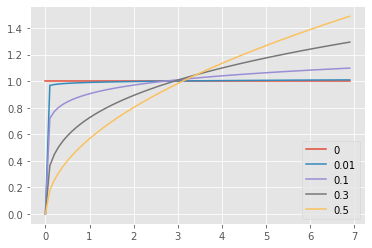

In [25]:
%matplotlib inline
from cProfile import label
import matplotlib.pylab as plt
import numpy as np
plt.style.use('ggplot')


x = np.arange(0,70) / 10.0
# y = x**0.3
for ee in [0, 0.01, 0.1, 0.3, 0.5]:
    plt.plot(x, x**ee * 7 / (1/(1+ee) * 7**(1+ee)), label=str(ee))

plt.legend()
plt.savefig("entr1.pdf")
# plt.show()

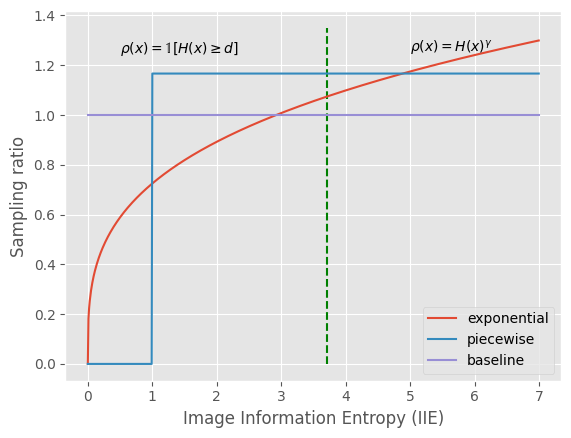

In [1]:
%matplotlib inline
from cProfile import label
import matplotlib.pylab as plt
import numpy as np
plt.style.use('ggplot')
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

x = np.arange(0,700) / 100.0
ee = 0.3
plt.plot(x, x**ee * 7 / (1/(1+ee) * 7**(1+ee)), label="exponential")
ee = 1

def y(x,d):
    y = np.zeros_like(x)
    y[np.where(x>=d)] = 1
    y *= 1 / y.mean()
    return y

plt.plot(x, y(x,ee), label="piecewise")
plt.plot(x, x**0, label="baseline")
plt.vlines([3.7,], 0, 1.35, linestyles='dashed', colors='green')
plt.text(5,1.25, r"$\rho(x) = H(x)^\gamma$")
plt.text(0.5,1.25, r"$\rho(x) = \mathbb{1}[H(x) \geq d]$")
# plt.text(5,0.6, "daS")
plt.xlabel("Image Information Entropy (IIE)")
plt.ylabel("Sampling ratio")
plt.legend()
plt.savefig("entr1.pdf")
# plt.show()

<ipython-input-31-b0344749cb90>:3: RuntimeWarning: invalid value encountered in power
  plt.plot(x, (x-ee)**0.0001 *7 / (7-ee), label=ee)
<ipython-input-31-b0344749cb90>:3: RuntimeWarning: invalid value encountered in power
  plt.plot(x, (x-ee)**0.0001 *7 / (7-ee), label=ee)
<ipython-input-31-b0344749cb90>:3: RuntimeWarning: invalid value encountered in power
  plt.plot(x, (x-ee)**0.0001 *7 / (7-ee), label=ee)


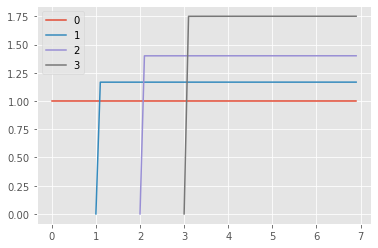

In [31]:
plt.plot(x, x**0, label=0)
for ee in [1,2,3]:
    plt.plot(x, (x-ee)**0.0001 *7 / (7-ee), label=ee)
plt.legend()
plt.savefig("entr2.pdf")

6.928955234205888


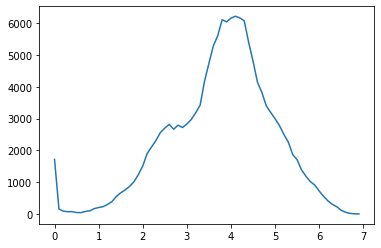

In [3]:
entr1_pth = '/home1/quanquan/datasets/Cephalometric/entr1/train/1.npy'
entr_map = np.load(entr1_pth)
print(entr_map.max())

entr_map = entr_map * 10
thres = np.arange(0,70)
thres[-1] = 999
box = np.zeros((70,))

for i in range(384):
    for j in range(384):
        idx = entr_map[i,j].astype(int)
        box[idx] += 1
# print(box)

plt.plot(np.arange(70)/10, box)
# plt.shot()

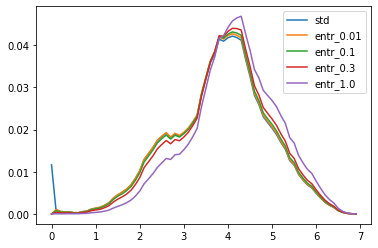

In [10]:
sum_std = sum(box)
plt.plot(np.arange(70)/10, box/sum_std, label="std")

x = np.arange(0,70) / 70.0
for ee in [0.01, 0.1, 0.3, 1.0]:
    y = x**ee
    sum_entr = sum(1*y*box)
    plt.plot(np.arange(70)/10, box*y/sum_entr, label=f"entr_{ee}")
    # print(sum_std, sum_entr)

plt.legend()